# Initilization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.layers import Dense, LSTM

import plotly.express as px #graphing
import plotly.graph_objects as go #graphing
from plotly.subplots import make_subplots #graphing


In [2]:
df=pd.read_csv(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Dataset\air-quality-india.csv')

In [3]:
df

Timestamp  Year  Month  Day  Hour   PM2.5
0      2017-11-07 12:00:00  2017     11    7    12   64.51
1      2017-11-07 13:00:00  2017     11    7    13   69.95
2      2017-11-07 14:00:00  2017     11    7    14   92.79
3      2017-11-07 15:00:00  2017     11    7    15  109.66
4      2017-11-07 16:00:00  2017     11    7    16  116.50
...                    ...   ...    ...  ...   ...     ...
36187  2022-06-04 11:00:00  2022      6    4    11   35.89
36188  2022-06-04 12:00:00  2022      6    4    12   33.83
36189  2022-06-04 13:00:00  2022      6    4    13   33.05
36190  2022-06-04 14:00:00  2022      6    4    14   35.29
36191  2022-06-04 15:00:00  2022      6    4    15   40.67

[36192 rows x 6 columns]

In [4]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df['Date']=df["Timestamp"].dt.date
df.head()

Timestamp  Year  Month  Day  Hour   PM2.5        Date
0 2017-11-07 12:00:00  2017     11    7    12   64.51  2017-11-07
1 2017-11-07 13:00:00  2017     11    7    13   69.95  2017-11-07
2 2017-11-07 14:00:00  2017     11    7    14   92.79  2017-11-07
3 2017-11-07 15:00:00  2017     11    7    15  109.66  2017-11-07
4 2017-11-07 16:00:00  2017     11    7    16  116.50  2017-11-07

# EDA

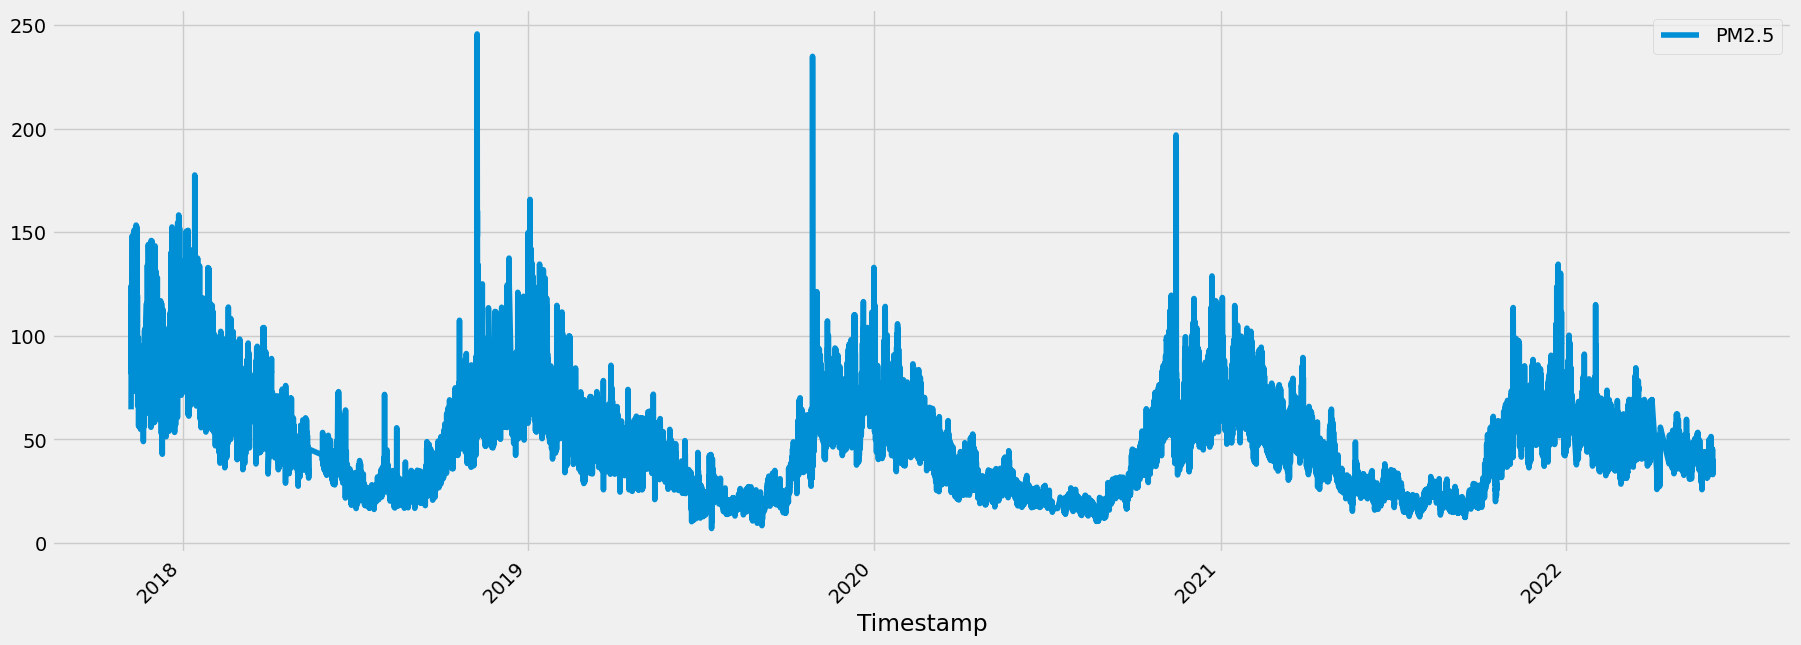

In [71]:
df.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.savefig(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Images\time_series.png')

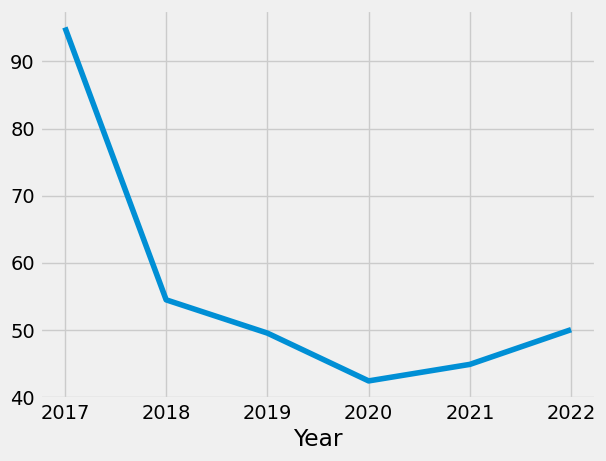

In [10]:
newdf = df.groupby('Year')['PM2.5'].mean()
newdf.plot(x='Year',y='PM2.5')

plt.savefig(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Images\yearly.png')

<AxesSubplot:xlabel='Year', ylabel='PM2.5'>

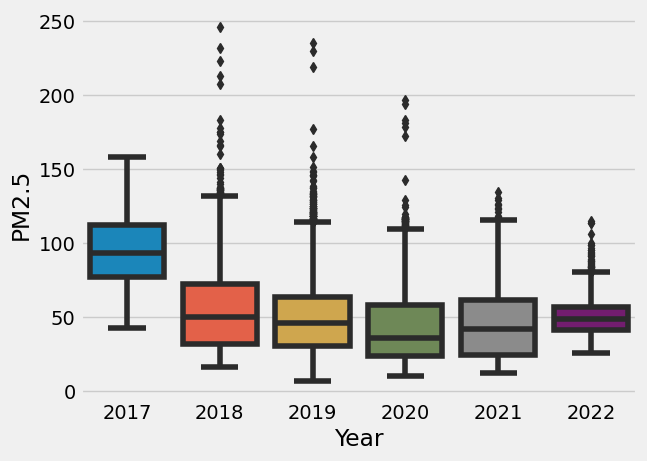

In [9]:
df_year=df.loc[:,['Year','PM2.5']]
sns.boxplot(x='Year', y='PM2.5',data=df_year)

In [5]:
fig = px.box(df, x = "Year", y = "PM2.5", points = "all", color = "Year",
             color_discrete_sequence = px.colors.qualitative.Set3,
             title = "PM2.5 Distribution by Year")

fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.update_traces(marker = dict(size = 0.75)) # scaling down the markers
fig.show()

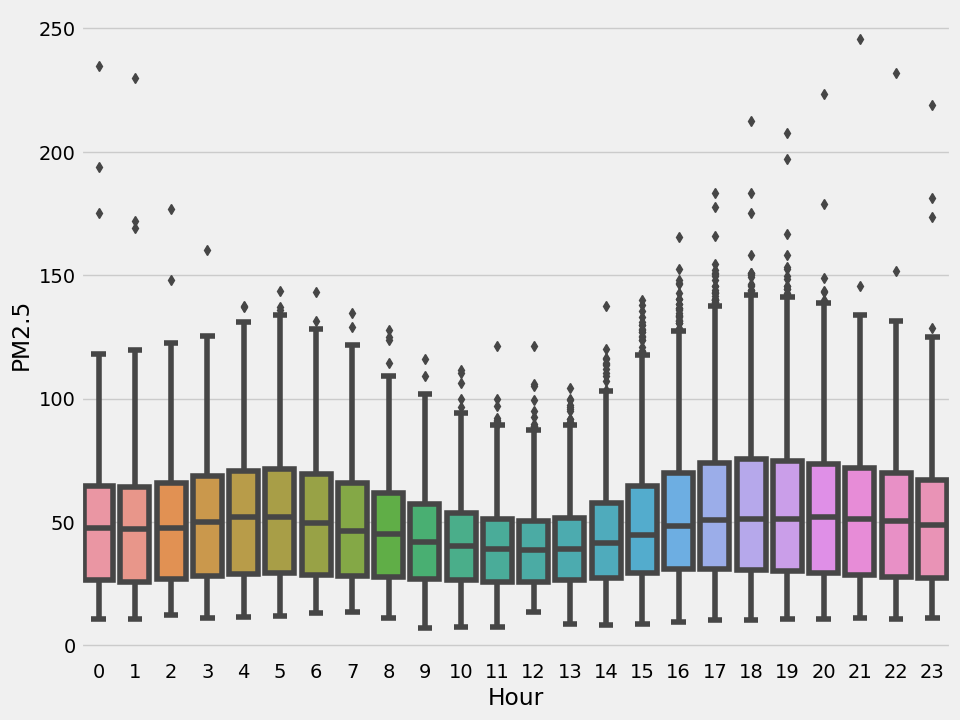

In [6]:
df_hour=df.loc[:,['Hour','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Hour', y='PM2.5',data=df_hour)
plt.savefig(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Images\hourly.png')

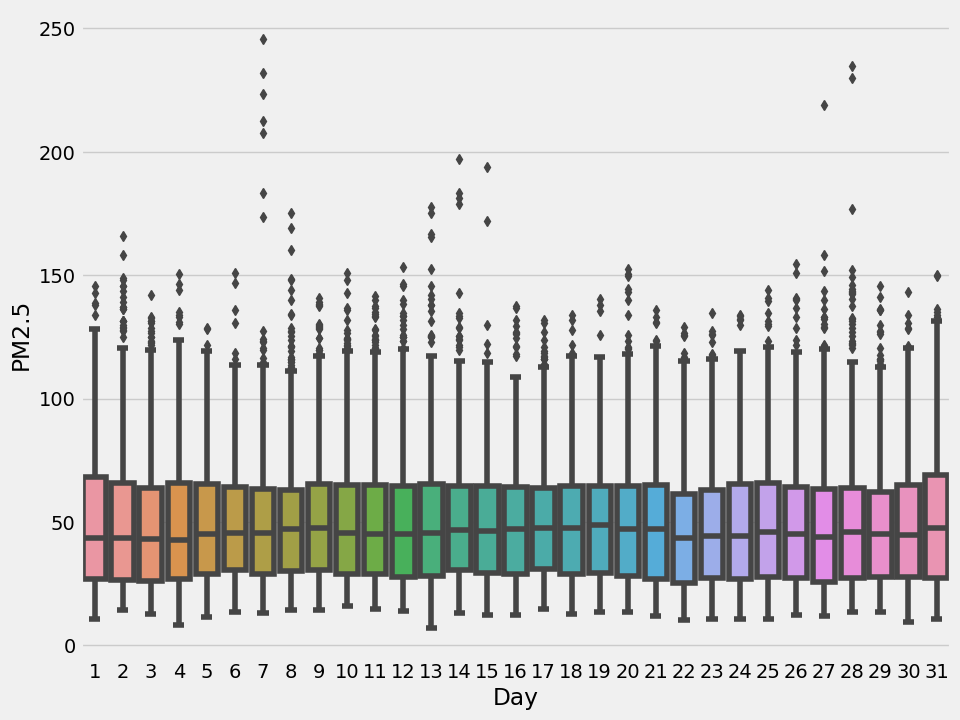

In [7]:
df_day=df.loc[:,['Day','PM2.5']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Day', y='PM2.5',data=df_day)
plt.savefig(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Images\daily.png')

# LSTM

<AxesSubplot:xlabel='Date'>

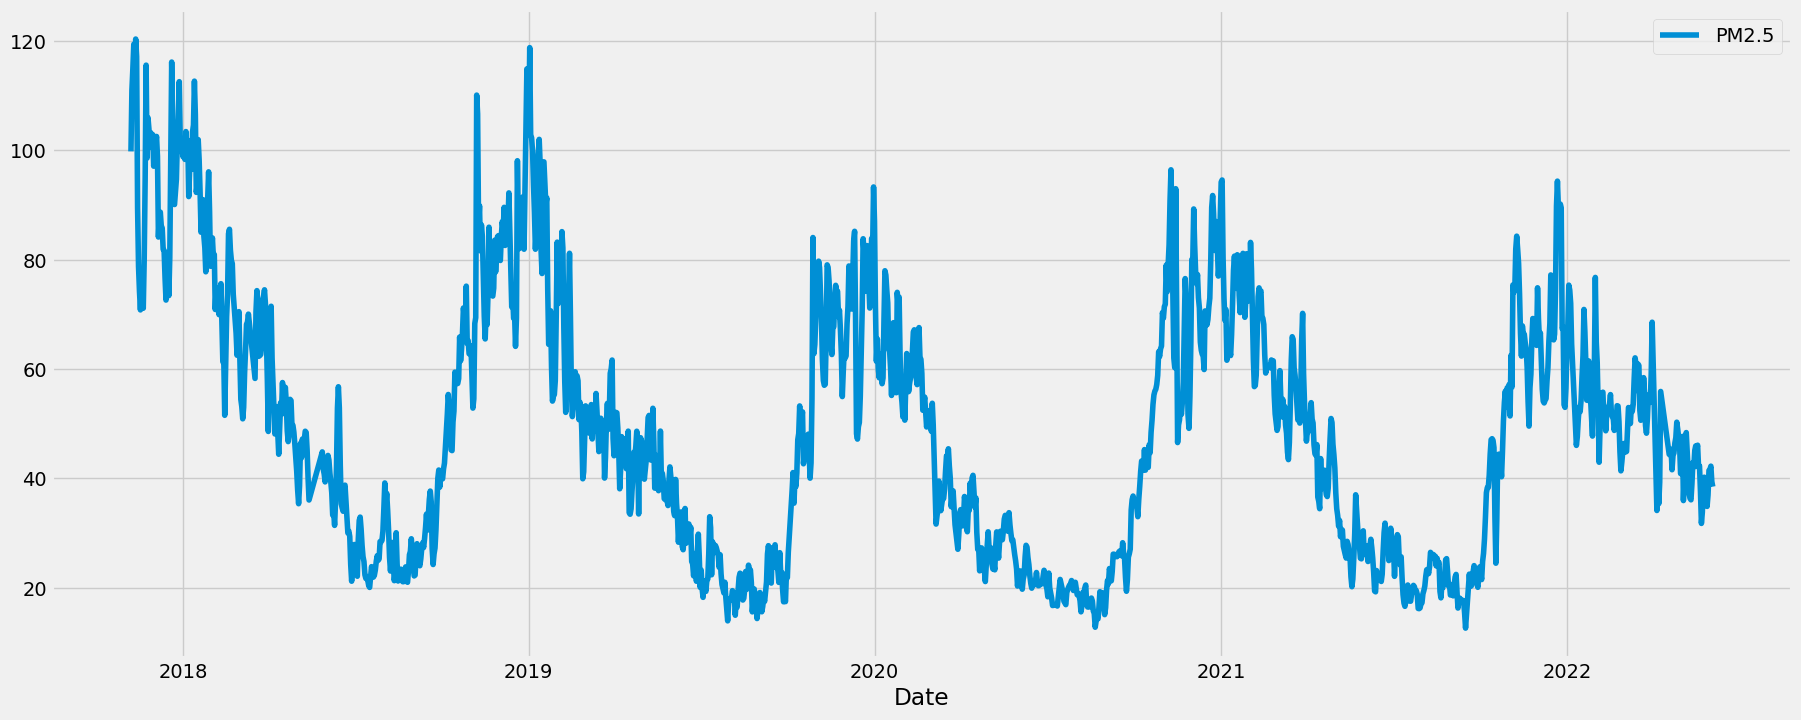

In [11]:
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date.plot(figsize=(20,8))

In [12]:
dataset  = df_date.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1293

In [13]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.80924161],
       [0.91297267],
       [0.94951492],
       ...,
       [0.27497376],
       [0.24870153],
       [0.24014526]])

In [14]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 30
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1263, 30, 1)

In [16]:
len(x_train)

1263

In [17]:
#model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1))) #layer 1 with 50 neurons
model.add(LSTM(50, return_sequences=False)) #layer 2 with 50 neurons
model.add(Dense(25)) #densly connected layer with 25 neurons
model.add(Dense(1)) #densly connected layer with 1 neurons

In [18]:
model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train,y_train, batch_size=1, epochs=15)

Epoch 1/15
1263/1263 [==============================] - 14s 9ms/step - loss: 0.0070
Epoch 2/15
1263/1263 [==============================] - 12s 9ms/step - loss: 0.0034
Epoch 3/15
1263/1263 [==============================] - 12s 10ms/step - loss: 0.0031
Epoch 4/15
1263/1263 [==============================] - 12s 9ms/step - loss: 0.0030
Epoch 5/15
1263/1263 [==============================] - 12s 10ms/step - loss: 0.0029
Epoch 6/15
1263/1263 [==============================] - 13s 10ms/step - loss: 0.0027
Epoch 7/15
1263/1263 [==============================] - 12s 10ms/step - loss: 0.0028
Epoch 8/15
1263/1263 [==============================] - 13s 10ms/step - loss: 0.0027
Epoch 9/15
1263/1263 [==============================] - 12s 10ms/step - loss: 0.0026
Epoch 10/15
1263/1263 [==============================] - 12s 10ms/step - loss: 0.0027
Epoch 11/15
1263/1263 [==============================] - 13s 10ms/step - loss: 0.0026
Epoch 12/15
1263/1263 [==============================] - 12s 10ms/

# Prediction

In [19]:
test_data = scaled_data[training_data_len-30: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [20]:
test_data

array([[0.11761113],
       [0.14492775],
       [0.16517346],
       [0.1249296 ],
       [0.12661997],
       [0.13983731],
       [0.13726889],
       [0.11308157],
       [0.12676309],
       [0.13915266],
       [0.15085757],
       [0.13670027],
       [0.11878317],
       [0.09425158],
       [0.06295596],
       [0.06160083],
       [0.09772128],
       [0.08700152],
       [0.08194188],
       [0.08560248],
       [0.08185299],
       [0.07921975],
       [0.09151622],
       [0.13039243],
       [0.16237527],
       [0.17820178],
       [0.13932285],
       [0.14482331],
       [0.1490341 ],
       [0.11468296],
       [0.14883455],
       [0.16959085],
       [0.15208376],
       [0.13489773],
       [0.13458441],
       [0.08793108],
       [0.1269797 ],
       [0.14903182],
       [0.15870598],
       [0.15524401],
       [0.1159401 ],
       [0.10717495],
       [0.12105375],
       [0.08491009],
       [0.0568121 ],
       [0.04234922],
       [0.03699188],
       [0.046

In [21]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

11/11 [==============================] - 1s 7ms/step


2.5033255620675363

In [22]:
train = df_date[:training_data_len]
valid = df_date[training_data_len:]
valid["Predictions"] = predictions
valid

PM2.5  Predictions
Date                              
2021-06-28  28.667917    23.423998
2021-06-29  30.903750    28.014557
2021-06-30  29.017917    30.492931
2021-07-01  27.166667    27.697754
2021-07-02  27.132917    25.471779
...               ...          ...
2022-05-31  41.465417    35.699596
2022-06-01  41.645833    40.472843
2022-06-02  42.255417    39.675545
2022-06-03  39.425417    39.664795
2022-06-04  38.503750    36.306892

[323 rows x 2 columns]

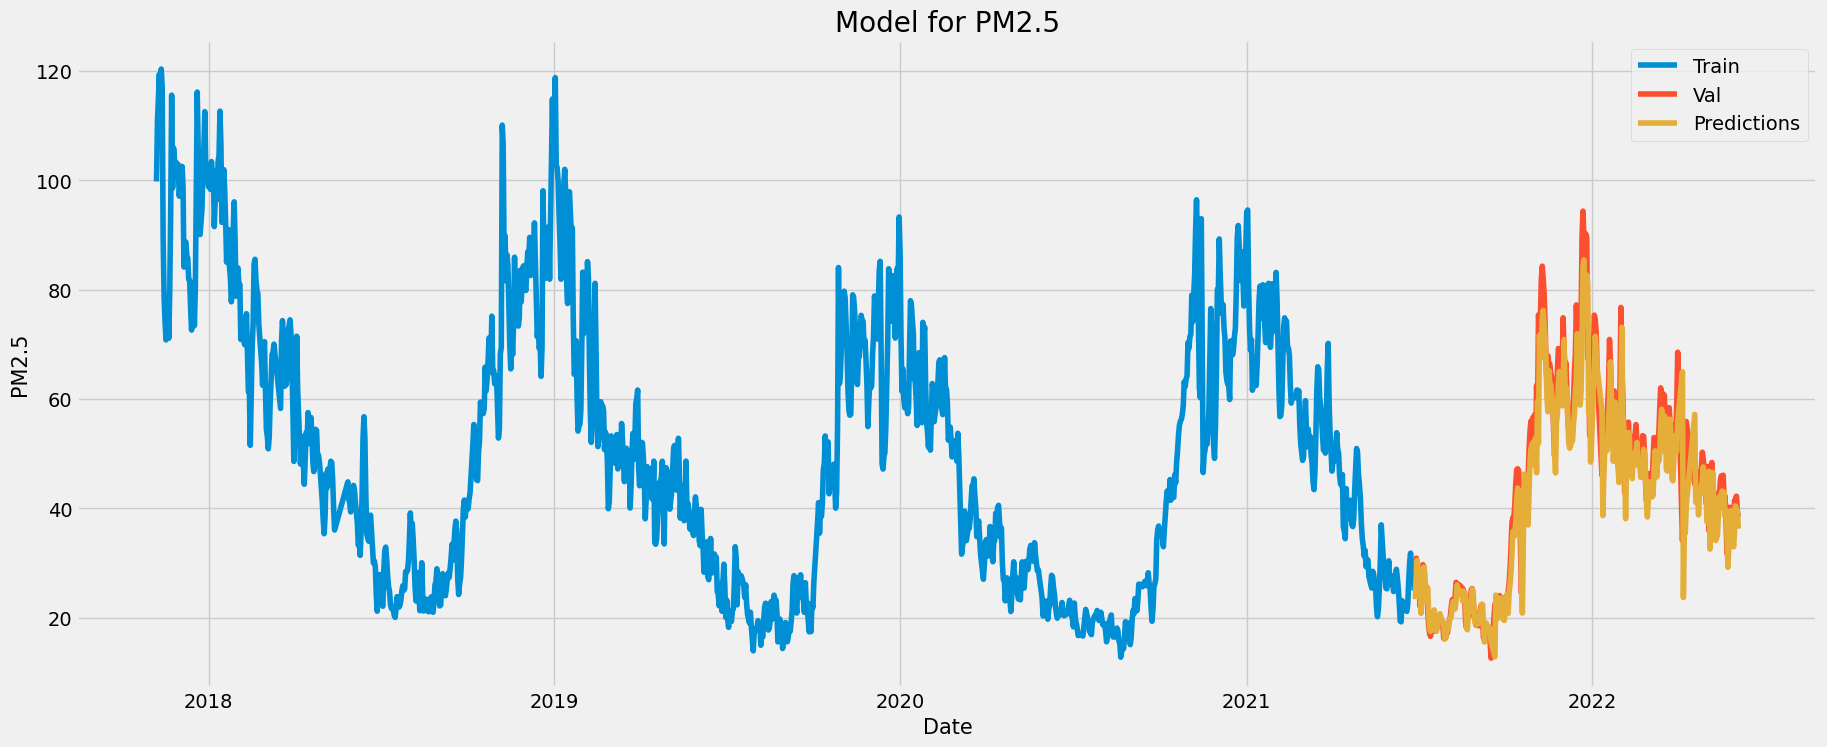

In [24]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[df_date.columns])
plt.plot(valid['PM2.5'])
plt.plot(valid["Predictions"])
plt.legend(["Train","Val","Predictions"])
plt.savefig(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Images\prediction.png')

In [66]:
import pickle
filename = r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-03 00:04:10         3067
metadata.json                                  2022-12-03 00:04:10           64
variables.h5                                   2022-12-03 0

In [67]:
test_df=pd.read_csv(r'F:\PESU\Mechanical\7th sem\Data Science\Time series analysis of Air quality in India\Dataset\air_test.csv')

In [68]:
test_data = test_df.values
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(test_data)
x_testing = []
x_testing.append(scaled_data)
x_testing = np.array(x_testing)
x_testing = np.reshape(x_testing, (x_testing.shape[0],x_testing.shape[1],1))

In [69]:
x_testing.shape

(1, 30, 1)

In [70]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(x_testing)
pred_test = sc.inverse_transform(result)
print(pred_test)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-03 00:04:10         3067
metadata.json                                  2022-12-03 00:04:10           64
variables.h5                                   2022-12-03 00:04:10       412184
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
........